## Эллиптический параболоид: 	
${x^2}/{9} + {y^2}/{25} = 2z $

## Выводы
С прогнозом для уже 3 параметров получается значительно хуже (или я делаю что-то не так:))
Параметр `a` должен быть 9 (9.34), `b` - 25 (22.99)
Даже таких результатов удалось достичь, только подстраивая Learn Rate
Возможно такая схема справляется хуже с нелинейными завияимостями, или нужно еще больше эпох

In [113]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [184]:
np.random.seed(42)
# для тренировочных данных
sz = 100
x = np.random.rand(sz, 1)
y = np.random.rand(sz, 1)
z = (x**2 / 9 + y**2 / 25) / 2 + np.random.randn(sz, 1)

In [185]:
idx = np.arange(sz)
np.random.shuffle(idx)

sz80 = int(sz * 0.8)
train_idx = idx[:sz80]
val_idx = idx[sz80:]

# формируем наборы обучающих данных
x_train, y_train, z_train = x[train_idx], y[train_idx], z[train_idx]
# и наборы для валидации
x_val, y_val, z_val = x[val_idx], y[val_idx], z[val_idx]

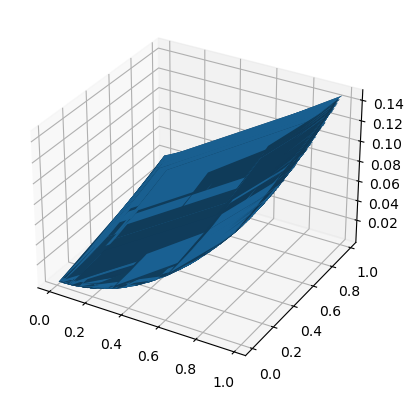

In [190]:
X, Y = np.meshgrid(x, y)
Z = (X**2 / 9 + Y**2 / 25)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2)

In [186]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

cuda


In [197]:
from torch import optim, nn

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

# скорость обучения
lr = 0.6

# количество эпох
n_epochs = 1000

# функция расчёта лосса
loss_fn = nn.MSELoss(reduction='mean')

# создаём SGD оптимизатор для автоматического обновления параметров
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    zhat = (x_train_tensor**2 / a + y_train_tensor**2 / b) / 2

    loss = loss_fn(zhat, z_train_tensor)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
tensor([9.3454], device='cuda:0', requires_grad=True) tensor([22.9990], device='cuda:0', requires_grad=True)
